In [239]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import LabelEncoder

StatementMeta(032aaaac-60b2-43cf-93c8-66d12faea0c0, 56, 244, Finished, Available, Finished)

In [240]:
import sklearn
print(sklearn.__version__)

StatementMeta(032aaaac-60b2-43cf-93c8-66d12faea0c0, 56, 245, Finished, Available, Finished)

1.1.3


In [241]:
! pip install scikit-learn==1.1.3 
! pip install imbalanced-learn==0.8.0


StatementMeta(032aaaac-60b2-43cf-93c8-66d12faea0c0, 56, 246, Finished, Available, Finished)

In [242]:
import sklearn
import imblearn

print(f"scikit-learn version: {sklearn.__version__}")
print(f"imbalanced-learn version: {imblearn.__version__}")

StatementMeta(032aaaac-60b2-43cf-93c8-66d12faea0c0, 56, 247, Finished, Available, Finished)

scikit-learn version: 1.1.3
imbalanced-learn version: 0.8.0


In [243]:
from imblearn.over_sampling import SMOTE

StatementMeta(032aaaac-60b2-43cf-93c8-66d12faea0c0, 56, 248, Finished, Available, Finished)

In [244]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, roc_auc_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

StatementMeta(032aaaac-60b2-43cf-93c8-66d12faea0c0, 56, 249, Finished, Available, Finished)

# **First dataset**

In [245]:
#load and print dataset

heart = pd.read_csv("Users/amohammad4/heart_statlog_cleveland_hungary_final.csv")  
print(heart) 


StatementMeta(032aaaac-60b2-43cf-93c8-66d12faea0c0, 56, 250, Finished, Available, Finished)

      age  sex  chest pain type  resting bp s  cholesterol  \
0      40    1                2           140          289   
1      49    0                3           160          180   
2      37    1                2           130          283   
3      48    0                4           138          214   
4      54    1                3           150          195   
...   ...  ...              ...           ...          ...   
1185   45    1                1           110          264   
1186   68    1                4           144          193   
1187   57    1                4           130          131   
1188   57    0                2           130          236   
1189   38    1                3           138          175   

      fasting blood sugar  resting ecg  max heart rate  exercise angina  \
0                       0            0             172                0   
1                       0            0             156                0   
2                       0     

In [246]:
heart.head()

StatementMeta(032aaaac-60b2-43cf-93c8-66d12faea0c0, 56, 251, Finished, Available, Finished)

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [247]:
heart.dtypes

StatementMeta(032aaaac-60b2-43cf-93c8-66d12faea0c0, 56, 252, Finished, Available, Finished)

age                      int64
sex                      int64
chest pain type          int64
resting bp s             int64
cholesterol              int64
fasting blood sugar      int64
resting ecg              int64
max heart rate           int64
exercise angina          int64
oldpeak                float64
ST slope                 int64
target                   int64
dtype: object

In [248]:
print(heart.columns)


StatementMeta(032aaaac-60b2-43cf-93c8-66d12faea0c0, 56, 253, Finished, Available, Finished)

Index(['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope', 'target'],
      dtype='object')


In [249]:
heart.describe()

StatementMeta(032aaaac-60b2-43cf-93c8-66d12faea0c0, 56, 254, Finished, Available, Finished)

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [250]:
heart.isnull().sum()

StatementMeta(032aaaac-60b2-43cf-93c8-66d12faea0c0, 56, 255, Finished, Available, Finished)

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

In [251]:
# Confirm the type of `heart`
print(type(heart))

StatementMeta(032aaaac-60b2-43cf-93c8-66d12faea0c0, 56, 256, Finished, Available, Finished)

<class 'pandas.core.frame.DataFrame'>


**Standardize data**

In [252]:
# standardize numerical data
columns_standardise= ['age','resting bp s', 'cholesterol','max heart rate']

scaler = StandardScaler()
heart[columns_standardise] = scaler.fit_transform(heart[columns_standardise])


print(heart[columns_standardise].head())

StatementMeta(032aaaac-60b2-43cf-93c8-66d12faea0c0, 56, 257, Finished, Available, Finished)

        age  resting bp s  cholesterol  max heart rate
0 -1.466728      0.427328     0.775674        1.265039
1 -0.504600      1.516587    -0.299512        0.637758
2 -1.787437     -0.117301     0.716489       -1.636136
3 -0.611503      0.318402     0.035867       -1.244085
4  0.029915      0.971958    -0.151550       -0.695214


In [253]:
heart.head()

StatementMeta(032aaaac-60b2-43cf-93c8-66d12faea0c0, 56, 258, Finished, Available, Finished)

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,-1.466728,1,2,0.427328,0.775674,0,0,1.265039,0,0.0,1,0
1,-0.504600,0,3,1.516587,-0.299512,0,0,0.637758,0,1.0,2,1
2,-1.787437,1,2,-0.117301,0.716489,0,1,-1.636136,0,0.0,1,0
3,-0.611503,0,4,0.318402,0.035867,0,0,-1.244085,1,1.5,2,1
4,0.029915,1,3,0.971958,-0.151550,0,0,-0.695214,0,0.0,1,0


In [254]:
heart.corr()

StatementMeta(032aaaac-60b2-43cf-93c8-66d12faea0c0, 56, 259, Finished, Available, Finished)

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
age,1.000000,0.015096,0.149055,0.257692,-0.046472,0.178923,0.194595,-0.368676,0.188095,0.245093,0.237749,0.262029
sex,0.015096,1.000000,0.138405,-0.006443,-0.208441,0.110961,-0.022225,-0.181837,0.194380,0.096390,0.127913,0.311267
chest pain type,0.149055,0.138405,1.000000,0.009466,-0.109396,0.076492,0.035705,-0.337491,0.403428,0.224106,0.276949,0.460127
resting bp s,0.257692,-0.006443,0.009466,1.000000,0.099037,0.088235,0.095860,-0.101357,0.142435,0.176111,0.089384,0.121415
cholesterol,-0.046472,-0.208441,-0.109396,0.099037,1.000000,-0.239778,0.150879,0.238028,-0.033261,0.057451,-0.100053,-0.198366
fasting blood sugar,0.178923,0.110961,0.076492,0.088235,-0.239778,1.000000,0.032124,-0.118689,0.053053,0.031193,0.145902,0.216695
resting ecg,0.194595,-0.022225,0.035705,0.095860,0.150879,0.032124,1.000000,0.058812,0.037821,0.126023,0.093629,0.073059
max heart rate,-0.368676,-0.181837,-0.337491,-0.101357,0.238028,-0.118689,0.058812,1.000000,-0.377691,-0.183688,-0.350750,-0.413278
exercise angina,0.188095,0.194380,0.403428,0.142435,-0.033261,0.053053,0.037821,-0.377691,1.000000,0.370772,0.393408,0.481467
oldpeak,0.245093,0.096390,0.224106,0.176111,0.057451,0.031193,0.126023,-0.183688,0.370772,1.000000,0.524639,0.398385


StatementMeta(032aaaac-60b2-43cf-93c8-66d12faea0c0, 56, 260, Finished, Available, Finished)

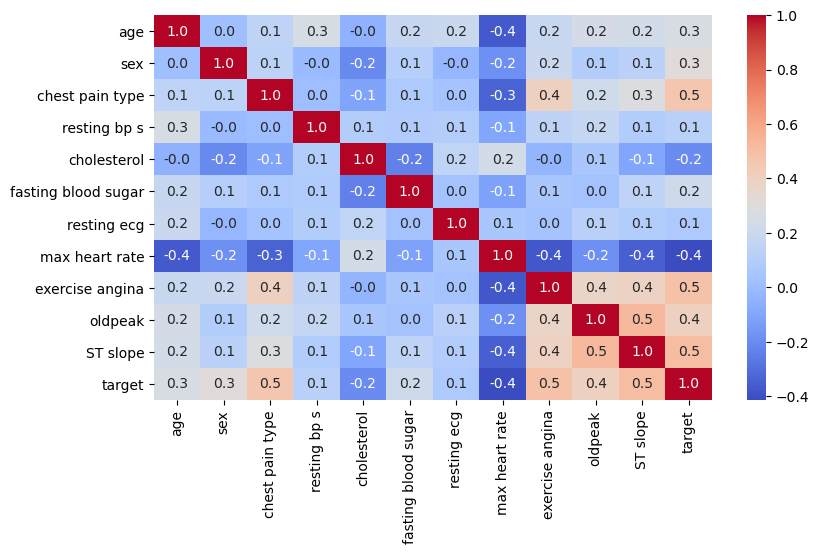

In [255]:
correlation = heart.corr()

plt.figure(figsize=(9, 5))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.1f')
plt.show()

# **Second dataset**

In [256]:
data_2 = 'Users/amohammad4/diabetes_binary_health_indicators_BRFSS2015.csv'  # File name as a string
lifestyle = pd.read_csv(data_2)  # Load the dataset
print(lifestyle)  # Print the dataset


StatementMeta(032aaaac-60b2-43cf-93c8-66d12faea0c0, 56, 261, Finished, Available, Finished)

        Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                   0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1                   0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2                   0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3                   0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4                   0.0     1.0       1.0        1.0  24.0     0.0     0.0   
...                 ...     ...       ...        ...   ...     ...     ...   
253675              0.0     1.0       1.0        1.0  45.0     0.0     0.0   
253676              1.0     1.0       1.0        1.0  18.0     0.0     0.0   
253677              0.0     0.0       0.0        1.0  28.0     0.0     0.0   
253678              0.0     1.0       0.0        1.0  23.0     0.0     0.0   
253679              1.0     1.0       1.0        1.0  25.0     0.0     0.0   

        HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHea

In [257]:
lifestyle.head()

StatementMeta(032aaaac-60b2-43cf-93c8-66d12faea0c0, 56, 262, Finished, Available, Finished)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [258]:
lifestyle.isnull()

StatementMeta(032aaaac-60b2-43cf-93c8-66d12faea0c0, 56, 263, Finished, Available, Finished)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
253676,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
253677,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
253678,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [259]:
lifestyle.corr()

StatementMeta(032aaaac-60b2-43cf-93c8-66d12faea0c0, 56, 264, Finished, Available, Finished)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
Diabetes_binary,1.000000,0.263129,0.200276,0.064761,0.216843,0.060789,0.105816,0.177282,-0.118133,-0.040779,...,0.016255,0.031433,0.293569,0.069315,0.171337,0.218344,0.031430,0.177442,-0.124456,-0.163919
HighBP,0.263129,1.000000,0.298199,0.098508,0.213748,0.096991,0.129575,0.209361,-0.125267,-0.040555,...,0.038425,0.017358,0.300530,0.056456,0.161212,0.223618,0.052207,0.344452,-0.141358,-0.171235
HighChol,0.200276,0.298199,1.000000,0.085642,0.106722,0.091299,0.092620,0.180765,-0.078046,-0.040859,...,0.042230,0.013310,0.208426,0.062069,0.121751,0.144672,0.031205,0.272318,-0.070802,-0.085459
CholCheck,0.064761,0.098508,0.085642,1.000000,0.034495,-0.009929,0.024158,0.044206,0.004190,0.023849,...,0.117626,-0.058255,0.046589,-0.008366,0.031775,0.040585,-0.022115,0.090321,0.001510,0.014259
BMI,0.216843,0.213748,0.106722,0.034495,1.000000,0.013804,0.020153,0.052904,-0.147294,-0.087518,...,-0.018471,0.058206,0.239185,0.085310,0.121141,0.197078,0.042950,-0.036618,-0.103932,-0.100069
Smoker,0.060789,0.096991,0.091299,-0.009929,0.013804,1.000000,0.061173,0.114441,-0.087401,-0.077666,...,-0.023251,0.048946,0.163143,0.092196,0.116460,0.122463,0.093662,0.120641,-0.161955,-0.123937
Stroke,0.105816,0.129575,0.092620,0.024158,0.020153,0.061173,1.000000,0.203002,-0.069151,-0.013389,...,0.008776,0.034804,0.177942,0.070172,0.148944,0.176567,0.002978,0.126974,-0.076009,-0.128599
HeartDiseaseorAttack,0.177282,0.209361,0.180765,0.044206,0.052904,0.114441,0.203002,1.000000,-0.087299,-0.019790,...,0.018734,0.031000,0.258383,0.064621,0.181698,0.212709,0.086096,0.221618,-0.099600,-0.141011
PhysActivity,-0.118133,-0.125267,-0.078046,0.004190,-0.147294,-0.087401,-0.069151,-0.087299,1.000000,0.142756,...,0.035505,-0.061638,-0.266186,-0.125587,-0.219230,-0.253174,0.032482,-0.092511,0.199658,0.198539
Fruits,-0.040779,-0.040555,-0.040859,0.023849,-0.087518,-0.077666,-0.013389,-0.019790,0.142756,1.000000,...,0.031544,-0.044243,-0.103854,-0.068217,-0.044633,-0.048352,-0.091175,0.064547,0.110187,0.079929


**Standardize or encode data**

In [260]:
# Standardize nuerical columns
columns_to_scale = ['BMI', 'MentHlth', 'PhysHlth'] #these have numerical data

StatementMeta(032aaaac-60b2-43cf-93c8-66d12faea0c0, 56, 265, Finished, Available, Finished)

In [261]:
scaler = StandardScaler()
lifestyle[columns_to_scale] = scaler.fit_transform(lifestyle[columns_to_scale])


print(lifestyle[columns_to_scale].head())

StatementMeta(032aaaac-60b2-43cf-93c8-66d12faea0c0, 56, 266, Finished, Available, Finished)

        BMI  MentHlth  PhysHlth
0  1.757936  1.998592  1.233999
1 -0.511806 -0.429630 -0.486592
2 -0.057858  3.617407  2.954590
3 -0.209174 -0.429630 -0.486592
4 -0.663122 -0.024926 -0.486592


**Check categorical variables - is encoding needed? **

In [262]:
print(lifestyle['GenHlth'].head())
print(lifestyle['GenHlth'].unique()) 

StatementMeta(032aaaac-60b2-43cf-93c8-66d12faea0c0, 56, 267, Finished, Available, Finished)

0    5.0
1    3.0
2    5.0
3    2.0
4    2.0
Name: GenHlth, dtype: float64
[5. 3. 2. 4. 1.]


    1.0: 'Excellent',
    2.0: 'Very good',
    3.0: 'Good',
    4.0: 'Fair',
    5.0: 'Poor'   

In [263]:
print(lifestyle['Education'].head())
print(lifestyle['Education'].unique()) 

StatementMeta(032aaaac-60b2-43cf-93c8-66d12faea0c0, 56, 268, Finished, Available, Finished)

0    4.0
1    6.0
2    4.0
3    3.0
4    5.0
Name: Education, dtype: float64
[4. 6. 3. 5. 2. 1.]


    1.0: 'Never attended school or only kindergarten',
    2.0: 'Grades 1 through 8 (Elementary)',
    3.0: 'Grades 9 through 11 (Some high school)',
    4.0: 'Grade 12 or GED (High school graduate)',
    5.0: 'College 1 year to 3 years (Some college or technical school)',
    6.0: 'College 4 years or more (College graduate)'

In [264]:
print(lifestyle['Income'].head())
print(lifestyle['Income'].unique()) 

StatementMeta(032aaaac-60b2-43cf-93c8-66d12faea0c0, 56, 269, Finished, Available, Finished)

0    3.0
1    1.0
2    8.0
3    6.0
4    4.0
Name: Income, dtype: float64
[3. 1. 8. 6. 4. 7. 2. 5.]


    1.0: '<$10 K',
    2.0: '$10-$15 K',
    3.0: '$15-$20 K',
    4.0: '$20-$25 K',
    5.0: '$25-$35 K',
    6.0: '$35-$50 K',
    7.0: '$50-$75 K',
    8.0: '>$75 K'

In [265]:
print(lifestyle['Age'].unique()) 


StatementMeta(032aaaac-60b2-43cf-93c8-66d12faea0c0, 56, 270, Finished, Available, Finished)

[ 9.  7. 11. 10.  8. 13.  4.  6.  2. 12.  5.  1.  3.]


['Age'] categories are not defined properly. Couldn't find any description of the categories. This will be dropped.

**The data above indicates that the categorical variables are ordinal and already follow a structured order, eliminating the need for encoding.**

StatementMeta(032aaaac-60b2-43cf-93c8-66d12faea0c0, 56, 271, Finished, Available, Finished)

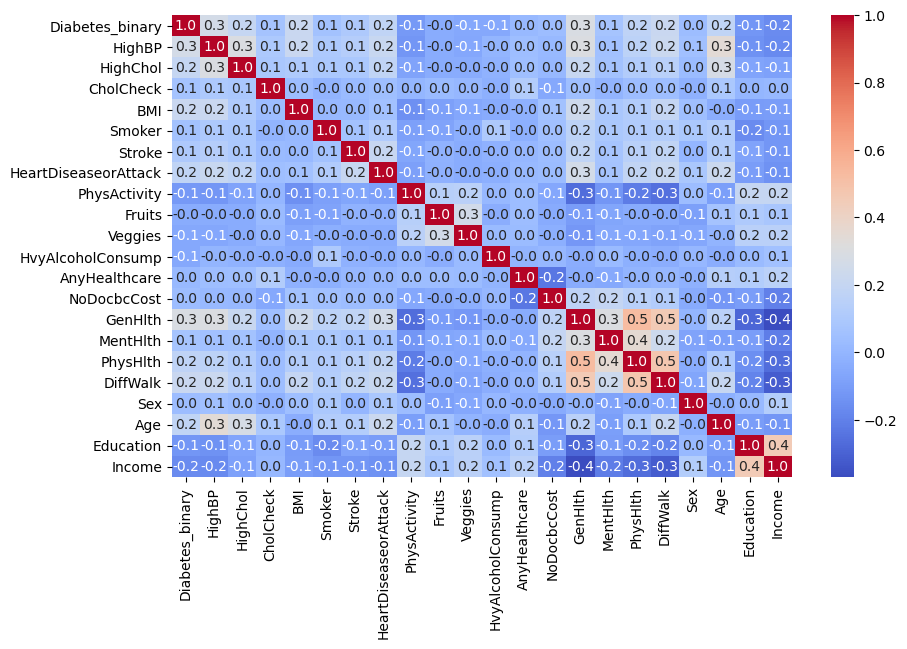

In [266]:
corr = lifestyle.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.1f')
plt.show()

# **Merging the two datasets**

In [267]:
# Check shapes of datasets before concatenation
print(heart.shape, lifestyle.shape)



StatementMeta(032aaaac-60b2-43cf-93c8-66d12faea0c0, 56, 272, Finished, Available, Finished)

(1190, 12) (253680, 22)


In [268]:
heart.head()

StatementMeta(032aaaac-60b2-43cf-93c8-66d12faea0c0, 56, 273, Finished, Available, Finished)

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,-1.466728,1,2,0.427328,0.775674,0,0,1.265039,0,0.0,1,0
1,-0.504600,0,3,1.516587,-0.299512,0,0,0.637758,0,1.0,2,1
2,-1.787437,1,2,-0.117301,0.716489,0,1,-1.636136,0,0.0,1,0
3,-0.611503,0,4,0.318402,0.035867,0,0,-1.244085,1,1.5,2,1
4,0.029915,1,3,0.971958,-0.151550,0,0,-0.695214,0,0.0,1,0


In [269]:
lifestyle.head()

StatementMeta(032aaaac-60b2-43cf-93c8-66d12faea0c0, 56, 274, Finished, Available, Finished)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,1.757936,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,1.998592,1.233999,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,-0.511806,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,-0.429630,-0.486592,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,-0.057858,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,3.617407,2.954590,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,-0.209174,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,-0.429630,-0.486592,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,-0.663122,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,-0.024926,-0.486592,0.0,0.0,11.0,5.0,4.0


**Using resample, I will be downsampling the rows in 'heart' dataset to match the 'lifestyle' dataset before merging.** Previously, upsampling was done, but overfitting of models was observed. So downsampling and then SMOTE (for balancing the data) will be applied.

In [270]:
from sklearn.utils import resample

Lifestyle_downsampled = resample(lifestyle,
                                     replace=True,     # Allow duplicates
                                     n_samples=heart.shape[0],  # Match size
                                     random_state=42)

Lifestyle_downsampled.shape

StatementMeta(032aaaac-60b2-43cf-93c8-66d12faea0c0, 56, 275, Finished, Available, Finished)

(1190, 22)

In [271]:
Lifestyle_downsampled.head()

StatementMeta(032aaaac-60b2-43cf-93c8-66d12faea0c0, 56, 276, Finished, Available, Finished)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
121958,1.0,1.0,0.0,1.0,1.001355,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,1.593889,-0.486592,1.0,0.0,11.0,5.0,6.0
146867,0.0,0.0,0.0,0.0,-0.814438,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,2.0,-0.429630,-0.486592,0.0,0.0,5.0,6.0,6.0
131932,0.0,0.0,1.0,1.0,-0.511806,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,-0.429630,-0.142474,0.0,0.0,9.0,6.0,8.0
103694,0.0,1.0,1.0,1.0,0.093458,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,-0.429630,-0.486592,0.0,1.0,11.0,6.0,7.0
119879,0.0,1.0,0.0,1.0,2.514516,1.0,0.0,0.0,1.0,1.0,...,1.0,1.0,1.0,1.593889,-0.486592,0.0,0.0,5.0,4.0,1.0


**Reset the indexes for both datasets because after operations like upsampling, the index may become misaligned or non-sequential. **

In [272]:
Lifestyle_downsampled_reset = Lifestyle_downsampled.reset_index(drop=True)
heart_reset = heart.reset_index(drop=True)


StatementMeta(032aaaac-60b2-43cf-93c8-66d12faea0c0, 56, 277, Finished, Available, Finished)

In [273]:
combined = pd.concat([Lifestyle_downsampled_reset, heart_reset], axis=1)  # Ensure alignment

StatementMeta(032aaaac-60b2-43cf-93c8-66d12faea0c0, 56, 278, Finished, Available, Finished)

In [274]:
combined.shape

StatementMeta(032aaaac-60b2-43cf-93c8-66d12faea0c0, 56, 279, Finished, Available, Finished)

(1190, 34)

**Check for null values.**

In [275]:
combined.isnull().sum()

StatementMeta(032aaaac-60b2-43cf-93c8-66d12faea0c0, 56, 280, Finished, Available, Finished)

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
age                     0
sex                     0
chest pain type         0
resting bp s            0
cholesterol             0
fasting blood sugar     0
resting ecg             0
max heart rate          0
exercise angina         0
oldpeak                 0
ST slope                0
target                  0
dtype: int64

In [276]:
combined.head()

StatementMeta(032aaaac-60b2-43cf-93c8-66d12faea0c0, 56, 281, Finished, Available, Finished)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,1.0,1.0,0.0,1.0,1.001355,0.0,0.0,0.0,0.0,1.0,...,2,0.427328,0.775674,0,0,1.265039,0,0.0,1,0
1,0.0,0.0,0.0,0.0,-0.814438,0.0,0.0,0.0,0.0,1.0,...,3,1.516587,-0.299512,0,0,0.637758,0,1.0,2,1
2,0.0,0.0,1.0,1.0,-0.511806,0.0,0.0,0.0,1.0,1.0,...,2,-0.117301,0.716489,0,1,-1.636136,0,0.0,1,0
3,0.0,1.0,1.0,1.0,0.093458,1.0,0.0,0.0,1.0,0.0,...,4,0.318402,0.035867,0,0,-1.244085,1,1.5,2,1
4,0.0,1.0,0.0,1.0,2.514516,1.0,0.0,0.0,1.0,1.0,...,3,0.971958,-0.151550,0,0,-0.695214,0,0.0,1,0


**QUALITY DATA CHECK ** - 

1. **Check for duplicates.**

In [277]:
combined.duplicated().sum()

StatementMeta(032aaaac-60b2-43cf-93c8-66d12faea0c0, 56, 282, Finished, Available, Finished)

0

2. **Check for columns with constant values or less unique values **

In [278]:
constant_columns = [col for col in combined.columns if combined[col].nunique() == 1]
constant_columns

StatementMeta(032aaaac-60b2-43cf-93c8-66d12faea0c0, 56, 283, Finished, Available, Finished)

[]

In [279]:
less_unique_columns = [col for col in combined.columns if combined[col].nunique() < 10]
less_unique_columns

StatementMeta(032aaaac-60b2-43cf-93c8-66d12faea0c0, 56, 284, Finished, Available, Finished)

['Diabetes_binary',
 'HighBP',
 'HighChol',
 'CholCheck',
 'Smoker',
 'Stroke',
 'HeartDiseaseorAttack',
 'PhysActivity',
 'Fruits',
 'Veggies',
 'HvyAlcoholConsump',
 'AnyHealthcare',
 'NoDocbcCost',
 'GenHlth',
 'DiffWalk',
 'Sex',
 'Education',
 'Income',
 'sex',
 'chest pain type',
 'fasting blood sugar',
 'resting ecg',
 'exercise angina',
 'ST slope',
 'target']

3. **From above list - drop similar columns**

Since 'sex' is already encoded as binary (0 and 1), it would be best to drop the 'Sex' column that contains decimal values (0.0 and 1.0). This is because the binary representation (0 and 1) is easier to work with and more commonly used in machine learning models.

In [280]:
combined = combined.copy()
combined.drop(columns=['Sex'], inplace=True)

StatementMeta(032aaaac-60b2-43cf-93c8-66d12faea0c0, 56, 285, Finished, Available, Finished)

In [281]:
combined.drop(columns=['Age'], inplace=True)

StatementMeta(032aaaac-60b2-43cf-93c8-66d12faea0c0, 56, 286, Finished, Available, Finished)

**FEATURE ENGINEERING**

**Combine 'target' and 'HeartDiseaseorAttack' which are similar and drop 'HeartDiseaseorAttack'.**

In [282]:
# Convert 'heartdiseaseorattack' to integer
combined['HeartDiseaseorAttack'] = combined['HeartDiseaseorAttack'].astype(int)

# Use 'heartdiseaseorattack' where available, otherwise keep 'target'
combined['target'] = combined['HeartDiseaseorAttack'].combine_first(combined['target'])

# Drop the old 'heartdiseaseorattack' column
combined.drop(columns=['HeartDiseaseorAttack'], inplace=True)

# Check the result
print(combined['target'].head())


StatementMeta(032aaaac-60b2-43cf-93c8-66d12faea0c0, 56, 287, Finished, Available, Finished)

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64


In [283]:
combined.to_csv("combined_heart_lifestyle_dataset.csv", index=False)  # Saves without the index


StatementMeta(032aaaac-60b2-43cf-93c8-66d12faea0c0, 56, 288, Finished, Available, Finished)

**Check for imbalanec in the new merged target variable.**

In [291]:
print(combined['target'].value_counts())  # To confirm binary classes are intact

StatementMeta(032aaaac-60b2-43cf-93c8-66d12faea0c0, 56, 296, Finished, Available, Finished)

0    1066
1     124
Name: target, dtype: int64


This is a highly imbalanced dataset, where the minority class (1) represents only about 10% of the total data. SMOTE, an Imbalanced Data Handing technique,  will be used it can generate synthetic samples for the minority class.

**IMBALANCED DATA HANDLING** - Using SMOTE

In [285]:
# Split the dataset into features and target
X = combined.drop(columns=['target'])
y = combined['target']


StatementMeta(032aaaac-60b2-43cf-93c8-66d12faea0c0, 56, 290, Finished, Available, Finished)

In [286]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

StatementMeta(032aaaac-60b2-43cf-93c8-66d12faea0c0, 56, 291, Finished, Available, Finished)

In [287]:
# Apply SMOTE to only the training set
from imblearn.combine import SMOTETomek

smote_tomek = SMOTETomek(sampling_strategy=, random_state=42)  # Instead of full balancing
X_train_resampled, y_train_resampled = smote_tomek.fit_resample(X_train, y_train)


StatementMeta(032aaaac-60b2-43cf-93c8-66d12faea0c0, 56, 292, Finished, Available, Finished)

In [288]:
print(f"Resampled training set class distribution:\n{y_train_resampled.value_counts()}")

StatementMeta(032aaaac-60b2-43cf-93c8-66d12faea0c0, 56, 293, Finished, Available, Finished)

Resampled training set class distribution:
0    855
1    598
Name: target, dtype: int64


In [289]:
#Check new target variable shape after applying SMOTE
y_train_resampled.shape

StatementMeta(032aaaac-60b2-43cf-93c8-66d12faea0c0, 56, 294, Finished, Available, Finished)

(1453,)

In [292]:
#Check feature matrix shape after applying SMOTE.
X_train_resampled.shape

StatementMeta(032aaaac-60b2-43cf-93c8-66d12faea0c0, 56, 297, Finished, Available, Finished)

(1453, 30)

**FEATURE SELECTION**

1. **Plot Correlation matrix - remove highly correlated features to reduce multicollinearity.**

StatementMeta(032aaaac-60b2-43cf-93c8-66d12faea0c0, 56, 298, Finished, Available, Finished)

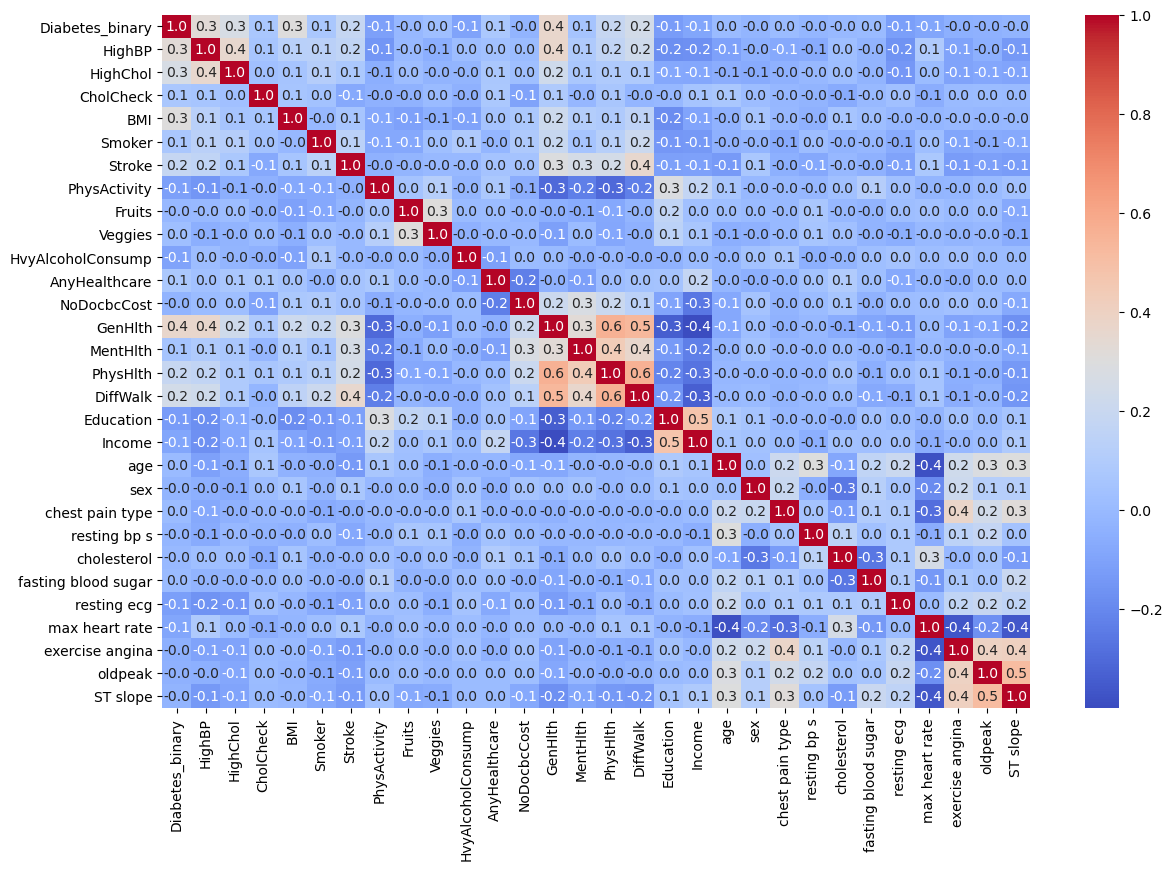

In [293]:
correlation_matrix = X_train_resampled.corr()

plt.figure(figsize=(14, 9))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.1f')
plt.show()

In [294]:
# Threshold to identify highly correlated features
correlation_matrix = X_train_resampled.corr()
correlation_threshold = 0.8 #(tried with 0.7 and 0.6 thresholds, same response)


StatementMeta(032aaaac-60b2-43cf-93c8-66d12faea0c0, 56, 299, Finished, Available, Finished)

In [295]:

# Find pairs of highly correlated features
correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

StatementMeta(032aaaac-60b2-43cf-93c8-66d12faea0c0, 56, 300, Finished, Available, Finished)

In [296]:
# Drop highly correlated features
X_train_resampled_reduced = X_train_resampled.drop(columns=correlated_features)
print(f"Removed features: {correlated_features}")
print(f"New shape: {X_train_resampled_reduced.shape}")


StatementMeta(032aaaac-60b2-43cf-93c8-66d12faea0c0, 56, 301, Finished, Available, Finished)

Removed features: set()
New shape: (1453, 30)


Since no features were removed, it suggests that your features are fairly independent of each other. 

2. **Point-biserial correlation - measures the strength and direction of the association between a continuous feature and a binary target variable.**

In [297]:
from scipy.stats import pointbiserialr

# List to store correlation results
correlation_results = []


StatementMeta(032aaaac-60b2-43cf-93c8-66d12faea0c0, 56, 302, Finished, Available, Finished)

In [298]:
# Iterate through features and compute point-biserial correlation
for column in X_train_resampled.columns:
    corr, _ = pointbiserialr(X_train_resampled[column], y_train_resampled)
    correlation_results.append((column, corr))

StatementMeta(032aaaac-60b2-43cf-93c8-66d12faea0c0, 56, 303, Finished, Available, Finished)

In [299]:
# Convert to a DataFrame
correlation_df = pd.DataFrame(correlation_results, columns=['Feature', 'Correlation'])

StatementMeta(032aaaac-60b2-43cf-93c8-66d12faea0c0, 56, 304, Finished, Available, Finished)

In [300]:
# Sort by correlation value (strongest correlation first)
correlation_df = correlation_df.sort_values(by='Correlation', ascending=False)

# Display sorted correlation values
print(correlation_df)

StatementMeta(032aaaac-60b2-43cf-93c8-66d12faea0c0, 56, 305, Finished, Available, Finished)

                Feature  Correlation
13              GenHlth     0.424237
2              HighChol     0.380342
1                HighBP     0.379855
6                Stroke     0.311531
0       Diabetes_binary     0.309147
16             DiffWalk     0.279207
5                Smoker     0.274416
15             PhysHlth     0.176428
14             MentHlth     0.071595
11        AnyHealthcare     0.045399
26       max heart rate     0.036937
3             CholCheck     0.036887
12          NoDocbcCost     0.028485
22         resting bp s     0.020014
8                Fruits     0.018066
4                   BMI    -0.000057
9               Veggies    -0.009740
23          cholesterol    -0.026829
10    HvyAlcoholConsump    -0.032891
20                  sex    -0.055200
21      chest pain type    -0.110885
19                  age    -0.119830
17            Education    -0.122139
7          PhysActivity    -0.141828
18               Income    -0.146703
24  fasting blood sugar    -0.154970
2

2. **Random Forest classifier -  easy way to measure feature importance. **

In [301]:
# Train a Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_resampled, y_train_resampled)

StatementMeta(032aaaac-60b2-43cf-93c8-66d12faea0c0, 56, 306, Finished, Available, Finished)

RandomForestClassifier(random_state=42)

In [302]:
importances = model.feature_importances_
feature_names = X_train_resampled.columns  

StatementMeta(032aaaac-60b2-43cf-93c8-66d12faea0c0, 56, 307, Finished, Available, Finished)

In [303]:
# Display feature importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

StatementMeta(032aaaac-60b2-43cf-93c8-66d12faea0c0, 56, 308, Finished, Available, Finished)

                Feature  Importance
2              HighChol    0.123213
1                HighBP    0.106513
13              GenHlth    0.095463
5                Smoker    0.066950
0       Diabetes_binary    0.059070
15             PhysHlth    0.051765
16             DiffWalk    0.038568
22         resting bp s    0.037969
19                  age    0.035577
26       max heart rate    0.034134
28              oldpeak    0.033825
4                   BMI    0.033639
6                Stroke    0.032393
23          cholesterol    0.028108
18               Income    0.027565
25          resting ecg    0.024710
8                Fruits    0.023683
17            Education    0.023396
14             MentHlth    0.018675
7          PhysActivity    0.017760
21      chest pain type    0.015806
9               Veggies    0.014914
27      exercise angina    0.011289
29             ST slope    0.010915
24  fasting blood sugar    0.008912
10    HvyAlcoholConsump    0.008089
12          NoDocbcCost    0

3. **RFE - using Logistic Regression as the estimator to select the top 20 features. **

In [304]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Use Logistic Regression for RFE
model = LogisticRegression(max_iter=1000, random_state=42)
rfe = RFE(estimator=model, n_features_to_select=20)  # Adjust the number of features
X_rfe = rfe.fit_transform(X_train_resampled, y_train_resampled)

# Check selected features
selected_columns = X.columns[rfe.support_]
print(f"Selected features: {selected_columns}")


StatementMeta(032aaaac-60b2-43cf-93c8-66d12faea0c0, 56, 309, Finished, Available, Finished)

Selected features: Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'PhysActivity', 'HvyAlcoholConsump', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'resting bp s',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'ST slope'],
      dtype='object')


4. **From above 4 feature selection techniques, results from Random forest classifier alligns with my analysis goals. So i will be selecting features with threshold equal to and above 0.02. **

In [305]:
top_features = feature_importance_df[feature_importance_df['Importance'] > 0.02]['Feature']

StatementMeta(032aaaac-60b2-43cf-93c8-66d12faea0c0, 56, 310, Finished, Available, Finished)

In [306]:
# Manually selected features to keep
keep_features = ['PhysActivity', 'sex', 'HvyAlcoholConsump', 'AnyHealthcare']
selected_features = list(set(top_features.tolist() + keep_features)) 

StatementMeta(032aaaac-60b2-43cf-93c8-66d12faea0c0, 56, 311, Finished, Available, Finished)

In [307]:
X_train_resamp_selected = X_train_resampled[selected_features]
X_test_selected = X_test[selected_features] 

StatementMeta(032aaaac-60b2-43cf-93c8-66d12faea0c0, 56, 312, Finished, Available, Finished)

In [308]:
X_train_resamp_selected = X_train_resamp_selected.drop(columns=['Fruits', 'oldpeak'], errors='ignore')
X_test_selected = X_test_selected.drop(columns=['Fruits', 'oldpeak'], errors='ignore') 

StatementMeta(032aaaac-60b2-43cf-93c8-66d12faea0c0, 56, 313, Finished, Available, Finished)

**X_train_resamp_selected is now, the selected features, from training dataset and are resampled.**

Apply **feature selection on test feature matrix** as well. 

In [309]:
X_train_resamp_selected.head()

StatementMeta(032aaaac-60b2-43cf-93c8-66d12faea0c0, 56, 314, Finished, Available, Finished)

,Smoker,BMI,GenHlth,resting bp s,Education,resting ecg,Income,Diabetes_binary,HvyAlcoholConsump,PhysHlth,Stroke,HighChol,sex,max heart rate,cholesterol,AnyHealthcare,age,PhysActivity,HighBP,DiffWalk
0,1.0,-0.209174,1.0,-0.117301,6.0,2,7.0,0.0,0.0,-0.371886,0.0,0.0,1,-0.303164,1.180101,1.0,0.992042,1.0,0.0,0.0
1,0.0,-0.360490,2.0,-0.661931,6.0,0,8.0,0.0,0.0,-0.486592,0.0,1.0,1,1.774704,0.864450,1.0,-2.215049,1.0,0.0,0.0
2,1.0,-0.663122,4.0,0.100551,4.0,2,4.0,0.0,0.0,2.954590,0.0,0.0,0,0.402527,1.959364,1.0,0.243721,0.0,1.0,0.0
3,0.0,-0.965755,2.0,-0.389616,5.0,2,4.0,0.0,0.0,-0.486592,0.0,0.0,1,0.872988,0.923635,1.0,2.488685,1.0,0.0,0.0
4,0.0,-0.360490,3.0,-0.335153,6.0,1,7.0,0.0,0.0,-0.486592,0.0,0.0,1,0.010477,-0.437609,1.0,0.243721,1.0,0.0,0.0


Check 'Stroke' values.

In [310]:
print(X_train_resamp_selected['Stroke'].unique())

StatementMeta(032aaaac-60b2-43cf-93c8-66d12faea0c0, 56, 315, Finished, Available, Finished)

[0.         1.         0.35949115 0.13292768 0.08675945 0.79829518
 0.29803312 0.09398194 0.96405773 0.03734819 0.36019064 0.12706051
 0.47775674 0.02414792 0.20481381 0.30402579 0.54922666 0.73789692
 0.58039994 0.01439349 0.47417383 0.50838412 0.47347177 0.37414008
 0.14351016 0.34130637 0.97348869 0.54174711 0.45438321 0.05853519
 0.68300677 0.87747201 0.42899403 0.75454287 0.90255291 0.10447677
 0.90538198 0.09128668 0.95060715 0.44844552 0.21038186 0.0912061
 0.94244124 0.11229582 0.64908499 0.61821806 0.91865122 0.91516229
 0.91649928 0.4926251  0.74604488 0.58336877 0.62512942 0.71428791
 0.96987883 0.44614572 0.03069746 0.69574869 0.41568569 0.09884199
 0.6201326  0.18812116 0.82253724 0.97363303 0.15041689 0.99971767
 0.7526519  0.77135719 0.32829932 0.22768161 0.43906203 0.1233464
 0.02878268 0.37969045 0.01454467 0.39224405 0.05047938 0.07586333
 0.87195416 0.13882717 0.66755774 0.95913138 0.72140966 0.49658273
 0.69039483 0.03931214 0.0791276  0.80620128 0.7575295  0.730756

In [311]:
print(X_train_resamp_selected['Stroke'].describe())


StatementMeta(032aaaac-60b2-43cf-93c8-66d12faea0c0, 56, 316, Finished, Available, Finished)

count    1453.000000
mean        0.091447
std         0.265793
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Stroke, dtype: float64


In [312]:
# Ensure that 'Stroke' column is binary
X_train_resamp_selected.loc[:, 'Stroke'] = X_train_resamp_selected['Stroke'].apply(lambda x: 1 if x == 1 else 0)
X_test_selected.loc[:, 'Stroke'] = X_test_selected['Stroke'].apply(lambda x: 1 if x == 1 else 0)


StatementMeta(032aaaac-60b2-43cf-93c8-66d12faea0c0, 56, 317, Finished, Available, Finished)

/tmp/ipykernel_8419/3244415458.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X_train_resamp_selected.loc[:, 'Stroke'] = X_train_resamp_selected['Stroke'].apply(lambda x: 1 if x == 1 else 0)
/tmp/ipykernel_8419/3244415458.py:3: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X_test_selected.loc[:, 'Stroke'] = X_test_selected['Stroke'].apply(lambda x: 1 if x == 1 else 0)


In [313]:
print(X_train_resamp_selected['Stroke'].unique())
print(X_test_selected['Stroke'].unique())

StatementMeta(032aaaac-60b2-43cf-93c8-66d12faea0c0, 56, 318, Finished, Available, Finished)

[0 1]
[0 1]


In [388]:
X_train_resamp_selected.shape

StatementMeta(032aaaac-60b2-43cf-93c8-66d12faea0c0, 56, 393, Finished, Available, Finished)

(1453, 20)

In [389]:
X_test_selected.shape

StatementMeta(032aaaac-60b2-43cf-93c8-66d12faea0c0, 56, 394, Finished, Available, Finished)

(238, 20)

# **Convert the Processed Data to a Tableau-Compatible Format**

In [316]:
import pandas as pd

# Combine X_test_selected and y_test
test_df = pd.concat([X_test_selected, y_test], axis=1)
test_df.to_csv("heart_disease_test_data.csv", index=False)

# Combine X_train_selected and y_train_resampled
train_df = pd.concat([X_train_resamp_selected, y_train_resampled], axis=1)
train_df.to_csv("heart_disease_train_data.csv", index=False)


StatementMeta(032aaaac-60b2-43cf-93c8-66d12faea0c0, 56, 321, Finished, Available, Finished)

# **4 Models development**

** Using the above selected features, we will be training 4 models using Function based coding.**

For model development use,** X,X_test_selected,y_train_resampled, y_test**.

**DEFINE FUNCTIONS FOR MODEL DEVELOPMENT AND EVALUATION **

In [317]:
def train_model(model, X_train, y_train):
    model.fit(X_train, y_train)
    return model

StatementMeta(032aaaac-60b2-43cf-93c8-66d12faea0c0, 56, 322, Finished, Available, Finished)

In [318]:
def train_model(model, X_train, y_train):
    model.fit(X_train, y_train)
    return model

StatementMeta(032aaaac-60b2-43cf-93c8-66d12faea0c0, 56, 323, Finished, Available, Finished)

In [319]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  # For binary classification
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_prob)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    return {
        'Accuracy': accuracy,
        'Precision': precision,
        'AUC/ROC': auc_roc,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'MAPE': mape
    }


StatementMeta(032aaaac-60b2-43cf-93c8-66d12faea0c0, 56, 324, Finished, Available, Finished)

**Empty list to store model evaluations.**

In [320]:
model_evaluations = [] 

StatementMeta(032aaaac-60b2-43cf-93c8-66d12faea0c0, 56, 325, Finished, Available, Finished)

**Shape of the train - test split columns.**

In [390]:
print(X_train_resamp_selected.shape)  
print(y_train_resampled.shape)  
print(X_test_selected.shape)  
print(y_test.shape) 


StatementMeta(032aaaac-60b2-43cf-93c8-66d12faea0c0, 56, 395, Finished, Available, Finished)

(1453, 20)
(1453,)
(238, 20)
(238,)


**TRAIN AND EVALUATE 4 MODELS**

1. **Logistic regression**

In [322]:
model_1 = 'Logistic Regression'

# Define a function to train Logistic Regression
def train_logistic_regression(X_train_resamp_selected, y_train_resampled):
    model = LogisticRegression(max_iter=500, random_state=42)
    model.fit(X_train_resamp_selected, y_train_resampled)
    return model

StatementMeta(032aaaac-60b2-43cf-93c8-66d12faea0c0, 56, 327, Finished, Available, Finished)

In [323]:
# Train the model using the function
log_reg = train_logistic_regression(X_train_resamp_selected, y_train_resampled)

StatementMeta(032aaaac-60b2-43cf-93c8-66d12faea0c0, 56, 328, Finished, Available, Finished)

In [324]:
# Make predictions on the test set
y_pred_log_reg = log_reg.predict(X_test_selected) 
y_prob_log_reg = log_reg.predict_proba(X_test_selected)[:, 1] 


StatementMeta(032aaaac-60b2-43cf-93c8-66d12faea0c0, 56, 329, Finished, Available, Finished)

In [325]:
log_reg_results = evaluate_model(log_reg, X_test_selected, y_test)
log_reg_results['Model Name'] = model_1 

StatementMeta(032aaaac-60b2-43cf-93c8-66d12faea0c0, 56, 330, Finished, Available, Finished)

In [326]:
model_1_evaluation_df = pd.DataFrame([log_reg_results])
model_1_evaluation_df

StatementMeta(032aaaac-60b2-43cf-93c8-66d12faea0c0, 56, 331, Finished, Available, Finished)

,Accuracy,Precision,AUC/ROC,MAE,MSE,RMSE,MAPE,Model Name
0,0.777311,0.25,0.741267,0.222689,0.222689,0.471899,inf,Logistic Regression


2. **Random Forest**

In [327]:
model_2 = 'Random Forest'
def train_random_forest(X_train_resamp_selected, y_train_resampled):
    model =RandomForestClassifier(
    n_estimators=100,
    max_depth=15,  # Prevents overfitting
    min_samples_split=5,
    min_samples_leaf=2,
    class_weight="balanced",
    random_state=42
)

    model.fit(X_train_resamp_selected, y_train_resampled)
    return model  

StatementMeta(032aaaac-60b2-43cf-93c8-66d12faea0c0, 56, 332, Finished, Available, Finished)

In [328]:
random_forest = train_random_forest(X_train_resamp_selected, y_train_resampled)

StatementMeta(032aaaac-60b2-43cf-93c8-66d12faea0c0, 56, 333, Finished, Available, Finished)

In [329]:
# Make predictions on the test set
y_pred_rf = random_forest.predict(X_test_selected) 
y_prob_rf = random_forest.predict_proba(X_test_selected)[:, 1] 


StatementMeta(032aaaac-60b2-43cf-93c8-66d12faea0c0, 56, 334, Finished, Available, Finished)

In [330]:
rf_results = evaluate_model(random_forest, X_test_selected, y_test)
rf_results['Model Name'] = model_2 

StatementMeta(032aaaac-60b2-43cf-93c8-66d12faea0c0, 56, 335, Finished, Available, Finished)

In [331]:
model_2_evaluation_df = pd.DataFrame([rf_results])
model_2_evaluation_df

StatementMeta(032aaaac-60b2-43cf-93c8-66d12faea0c0, 56, 336, Finished, Available, Finished)

,Accuracy,Precision,AUC/ROC,MAE,MSE,RMSE,MAPE,Model Name
0,0.878151,0.4,0.791381,0.121849,0.121849,0.349068,inf,Random Forest


3. **Gradient boosting**

In [392]:
from sklearn.utils.class_weight import compute_sample_weight
sample_weights = compute_sample_weight('balanced', y_train_resampled)


model_3 = 'Gradient Boosting'
def train_gradient_boosting(X_train_resamp_selected, y_train_resampled):
    model = GradientBoostingClassifier(random_state=42)
    model.fit(X_train_resamp_selected, y_train_resampled, sample_weight=sample_weights)
    return model


StatementMeta(032aaaac-60b2-43cf-93c8-66d12faea0c0, 56, 397, Finished, Available, Finished)

In [393]:
gradient_boosting = train_gradient_boosting(X_train_resamp_selected, y_train_resampled)

StatementMeta(032aaaac-60b2-43cf-93c8-66d12faea0c0, 56, 398, Finished, Available, Finished)

In [394]:
# Make predictions on the test set
y_pred_gb = gradient_boosting.predict(X_test_selected) 
y_prob_gb = gradient_boosting.predict_proba(X_test_selected)[:, 1] 


StatementMeta(032aaaac-60b2-43cf-93c8-66d12faea0c0, 56, 399, Finished, Available, Finished)

In [395]:
gb_results = evaluate_model(gradient_boosting, X_test_selected, y_test)
gb_results['Model Name'] = model_3

StatementMeta(032aaaac-60b2-43cf-93c8-66d12faea0c0, 56, 400, Finished, Available, Finished)

In [396]:
model_3_evaluation_df = pd.DataFrame([gb_results])
model_3_evaluation_df

StatementMeta(032aaaac-60b2-43cf-93c8-66d12faea0c0, 56, 401, Finished, Available, Finished)

,Accuracy,Precision,AUC/ROC,MAE,MSE,RMSE,MAPE,Model Name
0,0.861345,0.35,0.791469,0.138655,0.138655,0.372365,inf,Gradient Boosting


4. **SVM**

In [397]:
model_4= 'SVM'
def train_svm(X_train_resamp_selected, y_train_resampled):
    model = SVC(C=1.0, kernel='rbf', random_state=42, probability=True)
    model.fit(X_train_resamp_selected, y_train_resampled)
    return model

StatementMeta(032aaaac-60b2-43cf-93c8-66d12faea0c0, 56, 402, Finished, Available, Finished)

In [398]:
svm = train_svm(X_train_resamp_selected, y_train_resampled)

StatementMeta(032aaaac-60b2-43cf-93c8-66d12faea0c0, 56, 403, Finished, Available, Finished)

In [399]:
y_pred_svm = svm.predict(X_test_selected) 
y_prob_svm = svm.predict_proba(X_test_selected)[:, 1] 


StatementMeta(032aaaac-60b2-43cf-93c8-66d12faea0c0, 56, 404, Finished, Available, Finished)

In [400]:
svm_results = evaluate_model(svm, X_test_selected, y_test)
svm_results['Model Name'] = model_4

StatementMeta(032aaaac-60b2-43cf-93c8-66d12faea0c0, 56, 405, Finished, Available, Finished)

In [401]:
model_4_evaluation_df = pd.DataFrame([svm_results])
model_4_evaluation_df

StatementMeta(032aaaac-60b2-43cf-93c8-66d12faea0c0, 56, 406, Finished, Available, Finished)

,Accuracy,Precision,AUC/ROC,MAE,MSE,RMSE,MAPE,Model Name
0,0.815126,0.319149,0.719853,0.184874,0.184874,0.42997,inf,SVM


# **COMBINED RESULTS OF ALL 4 MODELS**

In [402]:
combined_results = pd.concat([model_1_evaluation_df, model_2_evaluation_df, model_3_evaluation_df,model_4_evaluation_df], ignore_index=True)
combined_results 

StatementMeta(032aaaac-60b2-43cf-93c8-66d12faea0c0, 56, 407, Finished, Available, Finished)

,Accuracy,Precision,AUC/ROC,MAE,MSE,RMSE,MAPE,Model Name
0,0.777311,0.250000,0.741267,0.222689,0.222689,0.471899,inf,Logistic Regression
1,0.878151,0.400000,0.791381,0.121849,0.121849,0.349068,inf,Random Forest
2,0.861345,0.350000,0.791469,0.138655,0.138655,0.372365,inf,Gradient Boosting
3,0.815126,0.319149,0.719853,0.184874,0.184874,0.429970,inf,SVM


In [403]:
# Reorder the columns to place 'Model Name' at the first position
cols = ['Model Name'] + [col for col in combined_results.columns if col != 'Model Name']
combined_results = combined_results[cols]

# Now 'Model Name' will be the first column
print(combined_results)


StatementMeta(032aaaac-60b2-43cf-93c8-66d12faea0c0, 56, 408, Finished, Available, Finished)

            Model Name  Accuracy  Precision   AUC/ROC       MAE       MSE  \
0  Logistic Regression  0.777311   0.250000  0.741267  0.222689  0.222689   
1        Random Forest  0.878151   0.400000  0.791381  0.121849  0.121849   
2    Gradient Boosting  0.861345   0.350000  0.791469  0.138655  0.138655   
3                  SVM  0.815126   0.319149  0.719853  0.184874  0.184874   

       RMSE  MAPE  
0  0.471899   inf  
1  0.349068   inf  
2  0.372365   inf  
3  0.429970   inf  


In [404]:
model_1 = train_logistic_regression(X_train_resamp_selected, y_train_resampled)
model_2 = train_random_forest(X_train_resamp_selected, y_train_resampled)
model_3 = train_gradient_boosting(X_train_resamp_selected, y_train_resampled)
model_4 = train_svm(X_train_resamp_selected, y_train_resampled)


StatementMeta(032aaaac-60b2-43cf-93c8-66d12faea0c0, 56, 409, Finished, Available, Finished)

In [405]:
import pickle

models = {
    "Model_1": model_1,
    "Model_2": model_2,
    "Model_3": model_3,
    "Model_4": model_4
}

# Saving all models in one pickle file
with open("all_models.pkl", "wb") as file:
    pickle.dump(models, file)

print("All models saved successfully!")


StatementMeta(032aaaac-60b2-43cf-93c8-66d12faea0c0, 56, 410, Finished, Available, Finished)

All models saved successfully!


In [122]:
with open("all_models.pkl", "wb") as file:
    pickle.dump(models, file)

print("All models saved in 'all_models.pkl'")


StatementMeta(032aaaac-60b2-43cf-93c8-66d12faea0c0, 40, 127, Finished, Available, Finished)

All models saved in 'all_models.pkl'


In [406]:
with open("all_models.pkl", "rb") as file:
    loaded_models = pickle.load(file)


StatementMeta(032aaaac-60b2-43cf-93c8-66d12faea0c0, 56, 411, Finished, Available, Finished)

In [407]:
model_mapping = {
    "Logistic Regression": "Model_1",
    "Random Forest": "Model_2",
    "Gradient boosting": "Model_3",
    "SVM": "Model_4"
}

StatementMeta(032aaaac-60b2-43cf-93c8-66d12faea0c0, 56, 412, Finished, Available, Finished)

In [408]:
# Ensure correct sorting and model extraction
best_model_name = combined_results.sort_values(by="Accuracy", ascending=False).iloc[0]["Model Name"]
print(f"Best Model Name: {best_model_name}")


StatementMeta(032aaaac-60b2-43cf-93c8-66d12faea0c0, 56, 413, Finished, Available, Finished)

Best Model Name: Random Forest


In [409]:
# Map it to the corresponding key in loaded_models
mapped_model_key = model_mapping.get(best_model_name)

StatementMeta(032aaaac-60b2-43cf-93c8-66d12faea0c0, 56, 414, Finished, Available, Finished)

In [410]:
# Ensure that the train functions return the models
model_1 = train_logistic_regression(X_train_resamp_selected, y_train_resampled)
model_2 = train_random_forest(X_train_resamp_selected, y_train_resampled)
model_3 = train_gradient_boosting(X_train_resamp_selected, y_train_resampled)
model_4 = train_svm(X_train_resamp_selected, y_train_resampled)

# Now we map them correctly based on the best model name
model_mapping = {
    "Logistic Regression": "Model_1",
    "Random Forest": "Model_2",
    "Gradient Boosting": "Model_3",  # Ensure the correct mapping
    "SVM": "Model_4"
}

# Get the best model name from combined_results
best_model_name = combined_results.sort_values(by="Accuracy", ascending=False).iloc[0]["Model Name"]
print(f"Best Model Name: {best_model_name}")

# Map the best model name to the corresponding key in model_mapping
mapped_model_key = model_mapping.get(best_model_name)

if mapped_model_key:
    print(f"Mapped Model Key: {mapped_model_key}")
    
    # Create a dictionary with the models, ensuring the key matches
    models = {
        "Model_1": model_1,  # Logistic Regression model
        "Model_2": model_2,  # Random Forest model
        "Model_3": model_3,  # Gradient Boosting model
        "Model_4": model_4   # SVM model
    }

    # Get the best model based on the key
    best_model = models.get(mapped_model_key)
    if best_model:
        print(f"Best model loaded: {best_model}")
    else:
        print("Error: Could not load the best model.")
else:
    print(f"Error: Best model name {best_model_name} not found in model_mapping.")


StatementMeta(032aaaac-60b2-43cf-93c8-66d12faea0c0, 56, 415, Finished, Available, Finished)

Best Model Name: Random Forest
Mapped Model Key: Model_2
Best model loaded: RandomForestClassifier(class_weight='balanced', random_state=42)


In [433]:
with open("best_heart_model_new.pkl", "wb") as file:
    pickle.dump(best_model, file)

print("Best model saved successfully!")


StatementMeta(032aaaac-60b2-43cf-93c8-66d12faea0c0, 56, 438, Finished, Available, Finished)

Best model saved successfully!


In [443]:
import pickle
from sklearn.preprocessing import StandardScaler

# Define the columns to standardize
columns_standardize = ['age', 'resting bp s', 'cholesterol', 'max heart rate', 'BMI', 'PhysHlth']

# Initialize and fit the scaler ONLY on training data
scaler = StandardScaler()
scaler.fit(X_train_resamp_selected[columns_standardize])  # ✅ Fit only on training data

# Save the scaler for later use in Streamlit
with open("scaler_.pkl", "wb") as file:
    pickle.dump(scaler, file)

print("Scaler saved successfully!")


StatementMeta(032aaaac-60b2-43cf-93c8-66d12faea0c0, 56, 448, Finished, Available, Finished)

Scaler saved successfully!


# **Feature importance using best_model**

In [434]:
import pickle

# Load the saved model
with open("best_heart_model_new.pkl", "wb") as file:
        pickle.dump(best_model, file)
        
print("Model loaded successfully!")


StatementMeta(032aaaac-60b2-43cf-93c8-66d12faea0c0, 56, 439, Finished, Available, Finished)

Model loaded successfully!


In [435]:
print(type(best_model))
print(best_model)

StatementMeta(032aaaac-60b2-43cf-93c8-66d12faea0c0, 56, 440, Finished, Available, Finished)

<class 'sklearn.ensemble._forest.RandomForestClassifier'>
RandomForestClassifier(class_weight='balanced', random_state=42)


StatementMeta(032aaaac-60b2-43cf-93c8-66d12faea0c0, 56, 441, Finished, Available, Finished)

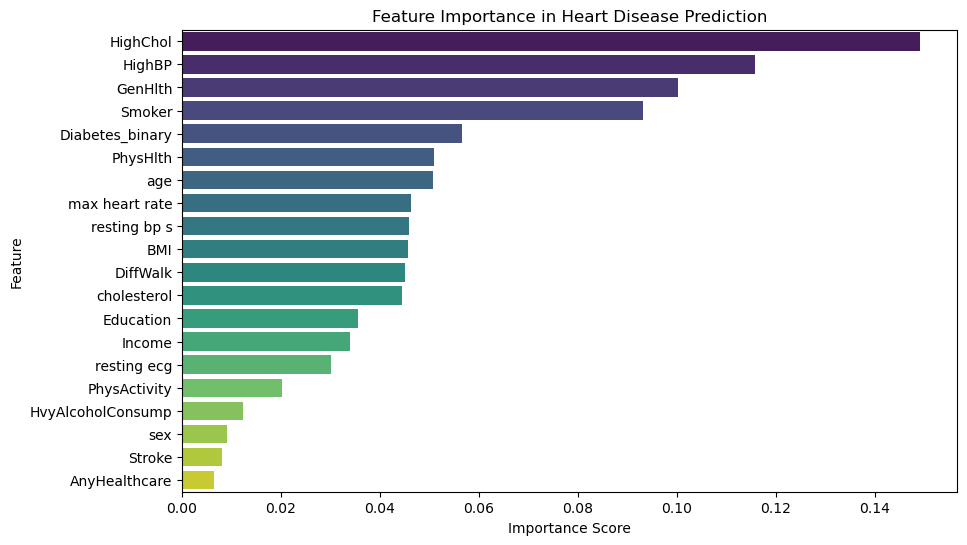

In [436]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extract feature importance
feature_importance = best_model.feature_importances_

# Create a DataFrame
importance_df = pd.DataFrame({
    'Feature': X_train_resamp_selected.columns,  # Use the same features as training
    'Importance': feature_importance
}).sort_values(by="Importance", ascending=False)

# Plot Feature Importance
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette="viridis")
plt.title("Feature Importance in Heart Disease Prediction")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


In [437]:
importance_df.to_csv("feature_importance.csv", index=False)

StatementMeta(032aaaac-60b2-43cf-93c8-66d12faea0c0, 56, 442, Submitted, Waiting, Running)

StatementMeta(032aaaac-60b2-43cf-93c8-66d12faea0c0, 56, 423, Finished, Available, Finished)

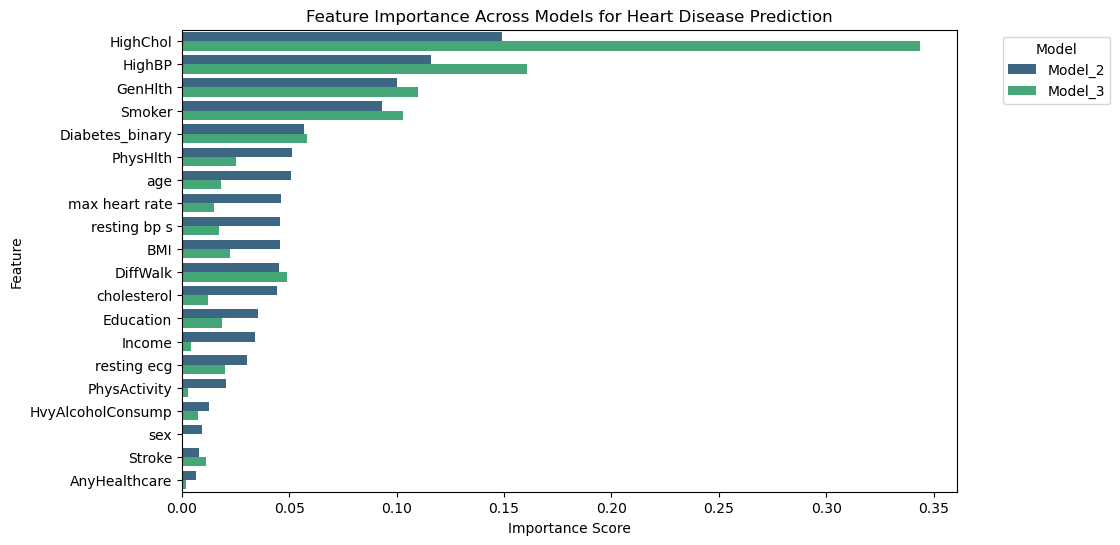

In [418]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming you have loaded the models dictionary
# Example of models: loaded_models = {'Random Forest': model_rf, 'Logistic Regression': model_lr, ...}

# Initialize an empty DataFrame to store feature importances
all_importance_df = pd.DataFrame()

# Loop through each model in the dictionary
for model_name, model in loaded_models.items():
    if hasattr(model, 'feature_importances_'):  # Check if model has feature_importances_
        # Extract feature importance
        feature_importance = model.feature_importances_

        # Create a DataFrame for each model
        importance_df = pd.DataFrame({
            'Feature': X_train_resamp_selected.columns,  # Use the same features as training
            'Importance': feature_importance
        }).sort_values(by="Importance", ascending=False)

        # Add the model name to the importance DataFrame
        importance_df['Model'] = model_name
        
        # Append the importance data of this model to the overall DataFrame
        all_importance_df = pd.concat([all_importance_df, importance_df])

# Plot Feature Importance for each model
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', hue='Model', data=all_importance_df, palette="viridis")
plt.title("Feature Importance Across Models for Heart Disease Prediction")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.legend(title="Model", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [419]:
all_importance_df = pd.concat([all_importance_df, importance_df])

StatementMeta(032aaaac-60b2-43cf-93c8-66d12faea0c0, 56, 424, Finished, Available, Finished)

In [420]:
all_importance_df.to_csv("all_feature_importance.csv", index=False)

StatementMeta(032aaaac-60b2-43cf-93c8-66d12faea0c0, 56, 425, Finished, Available, Finished)

**CONFUSION MATRIX FOR BEST MODEL**

In [421]:
with open("best_heart_model.pkl", "wb") as file:
        pickle.dump(best_model, file)
        
print("Model loaded successfully!")

StatementMeta(032aaaac-60b2-43cf-93c8-66d12faea0c0, 56, 426, Finished, Available, Finished)

Model loaded successfully!


StatementMeta(032aaaac-60b2-43cf-93c8-66d12faea0c0, 56, 436, Finished, Available, Finished)

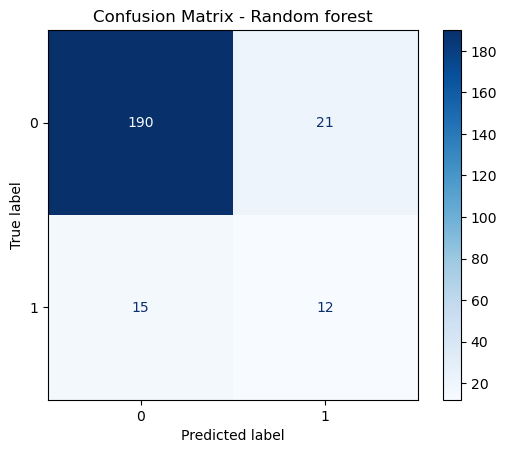

In [431]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


from sklearn.metrics import confusion_matrix
y_pred_prob= best_model.predict_proba(X_test_selected)[:, 1]
y_pred = (y_pred_prob >= 0.3).astype(int)  # Adjust threshold as needed
cm = confusion_matrix(y_test, y_pred)


# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix - Random forest')
plt.show()


In [423]:
def train_random_forest(X_train_resamp_selected, y_train_resampled):
    model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight="balanced")
    model.fit(X_train_resamp_selected, y_train_resampled)
    return model                                                                                                                  

StatementMeta(032aaaac-60b2-43cf-93c8-66d12faea0c0, 56, 428, Finished, Available, Finished)

In [424]:
new_random_forest = train_random_forest(X_train_resamp_selected, y_train_resampled)  

StatementMeta(032aaaac-60b2-43cf-93c8-66d12faea0c0, 56, 429, Finished, Available, Finished)

In [425]:
y_pred_rf = new_random_forest.predict(X_test_selected) 
y_prob_rf = new_random_forest.predict_proba(X_test_selected)[:, 1]  

StatementMeta(032aaaac-60b2-43cf-93c8-66d12faea0c0, 56, 430, Finished, Available, Finished)

In [426]:
new_rf_results = evaluate_model(random_forest, X_test_selected, y_test)
new_rf_results 

StatementMeta(032aaaac-60b2-43cf-93c8-66d12faea0c0, 56, 431, Finished, Available, Finished)

{'Accuracy': 0.8781512605042017,
 'Precision': 0.4,
 'AUC/ROC': 0.7913814288221871,
 'MAE': 0.12184873949579832,
 'MSE': 0.12184873949579832,
 'RMSE': 0.3490683879926659,
 'MAPE': inf}

StatementMeta(032aaaac-60b2-43cf-93c8-66d12faea0c0, 56, 432, Finished, Available, Finished)

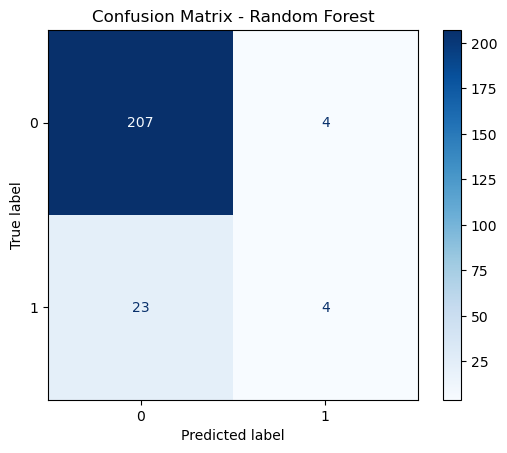

In [427]:
y_pred = new_random_forest.predict(X_test_selected)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.show()


StatementMeta(032aaaac-60b2-43cf-93c8-66d12faea0c0, 56, 433, Finished, Available, Finished)

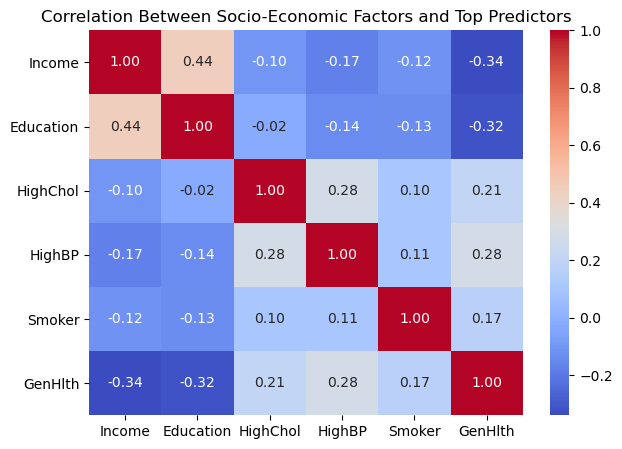

In [428]:
df = pd.read_csv("combined_heart_lifestyle_dataset.csv")  # Replace with actual file path


# Select socio-economic and top predictor columns
socio_eco_factors = ['Income', 'Education']
top_predictors = ['HighChol', 'HighBP', 'Smoker', 'GenHlth']

# Compute correlation
corr_matrix = df[socio_eco_factors + top_predictors].corr()

# Plot heatmap
plt.figure(figsize=(7,5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Socio-Economic Factors and Top Predictors")
plt.show()


In [429]:
pip install streamlit numpy pandas scikit-learn






pwd


streamlit run heart_disease_prediction.py

StatementMeta(032aaaac-60b2-43cf-93c8-66d12faea0c0, 56, 434, Finished, Available, Finished)

SyntaxError: invalid syntax (1853030324.py, line 1)